In [2]:
# KAGGLE IMPORTS
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# MAIN IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLEARN IMPORTS
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# IMPORT WARNINGS (TO IGNORE FILTER WARNINGS)
import warnings
warnings.filterwarnings("ignore")

In [3]:
data0 = pd.read_csv("fish.csv")
data1 = data0.copy()

In [4]:
data1.shape

(159, 7)

In [5]:
data1.isna().sum().sum()

0

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
data1.drop("Species", axis = 1, inplace = True)

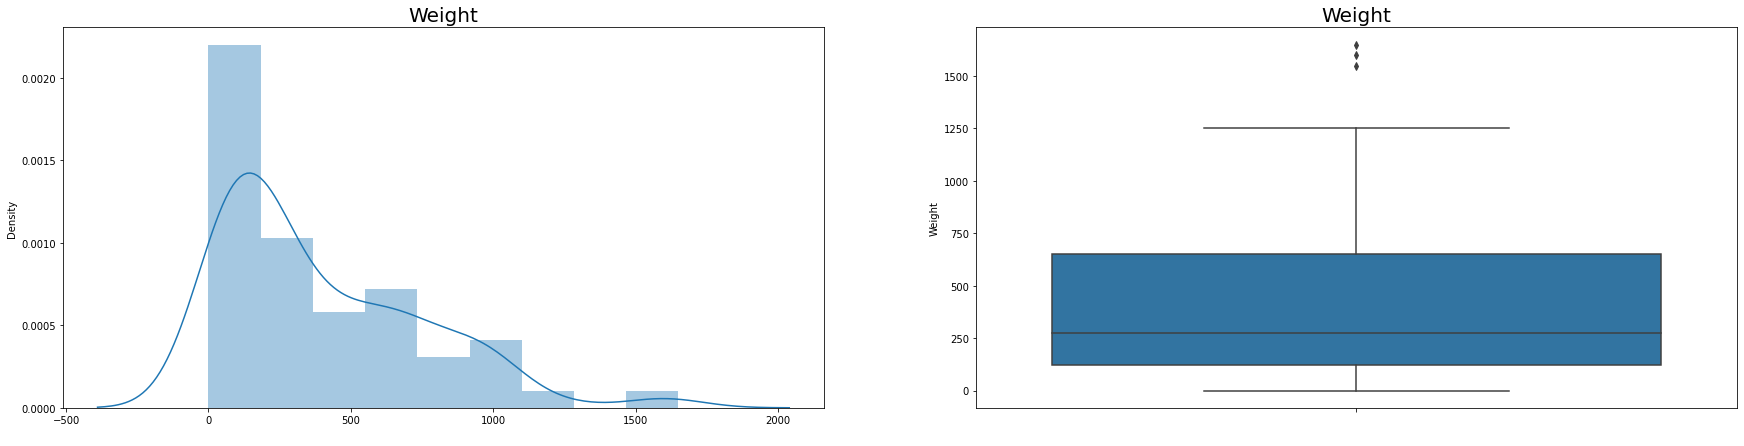

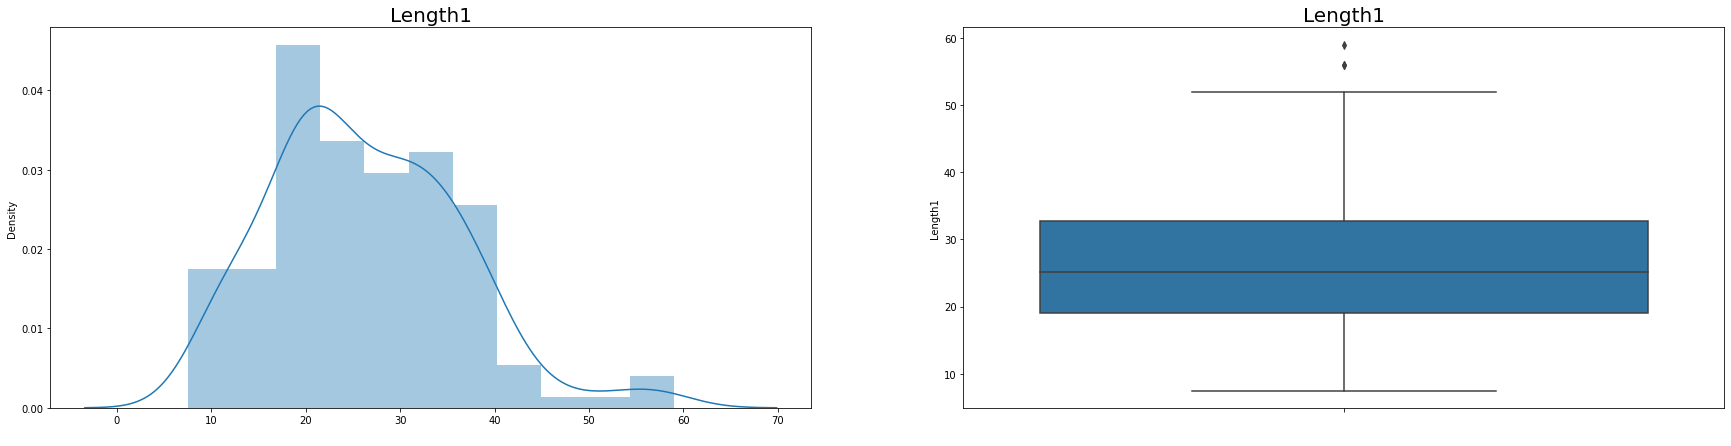

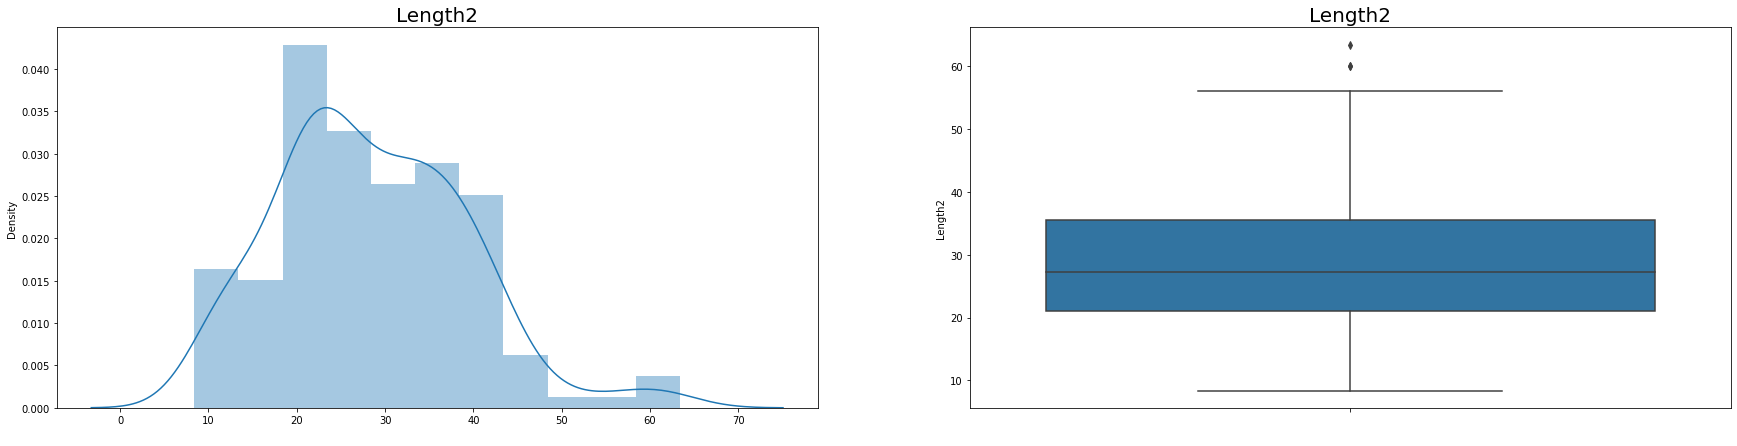

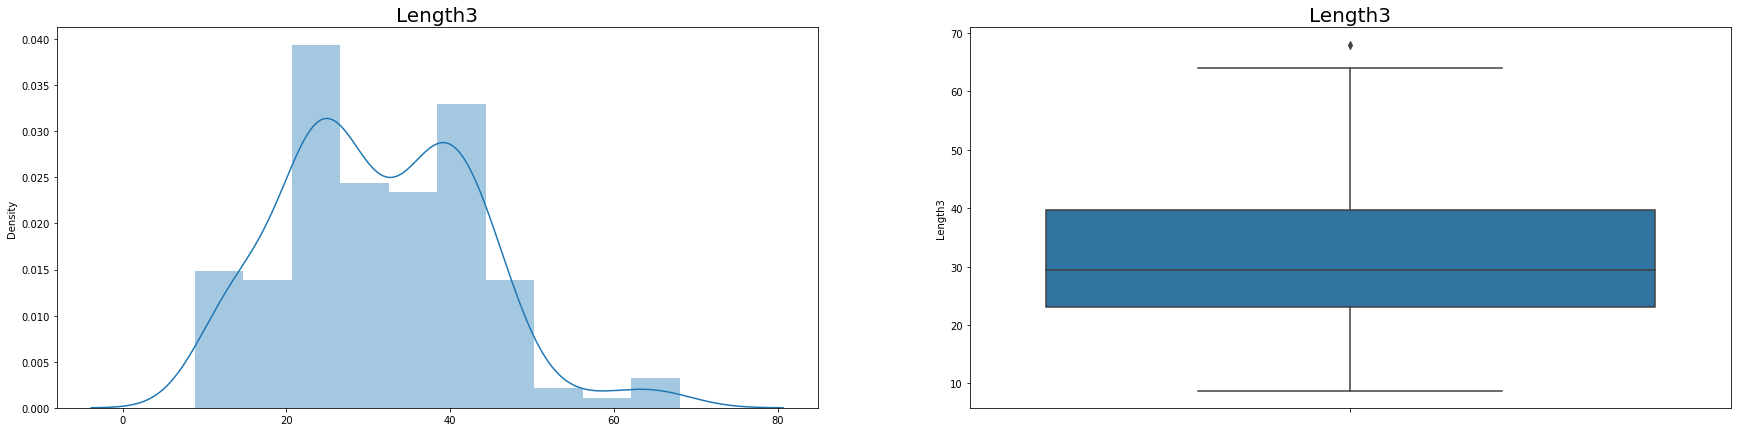

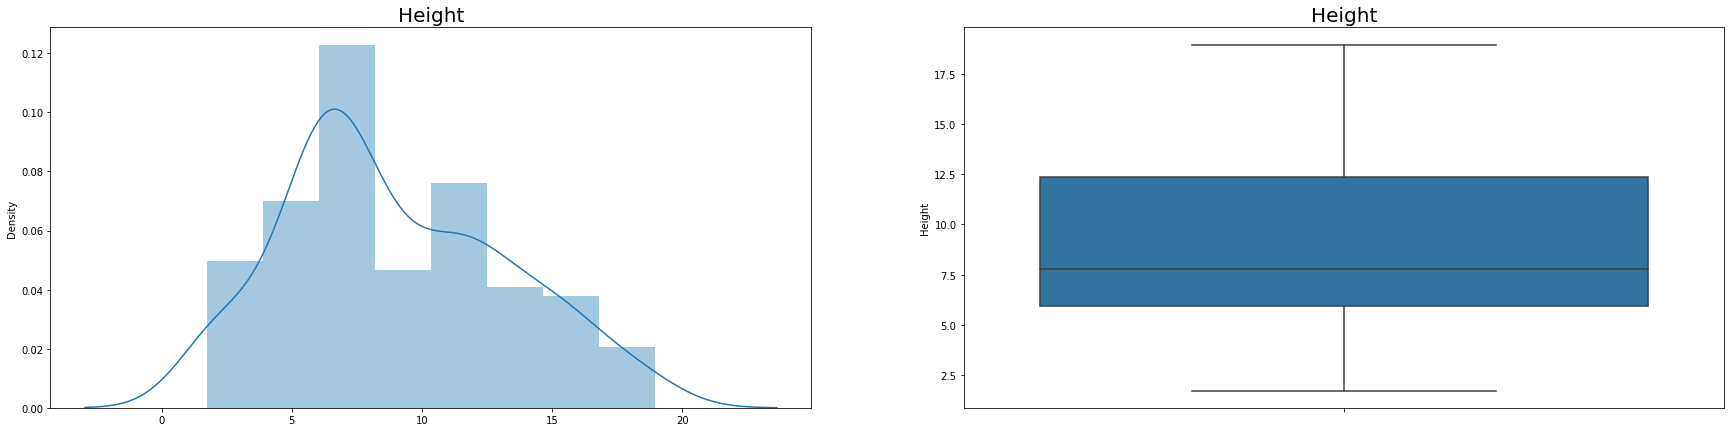

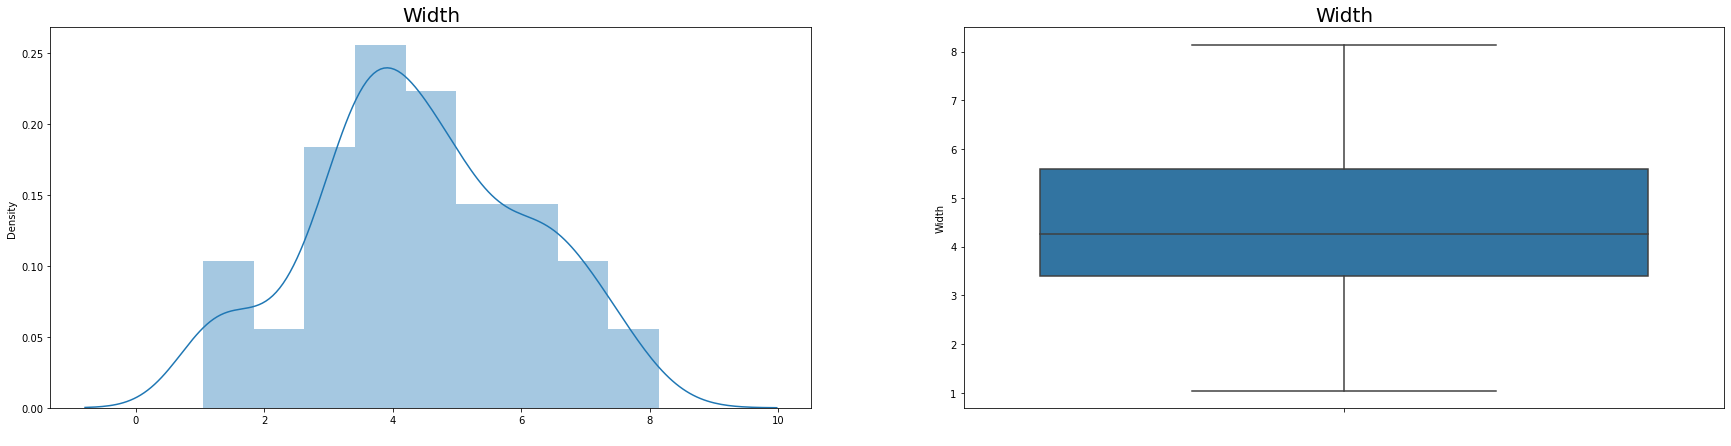

In [8]:
data1_columns = data1.columns
data1_columns

for index,col in enumerate(data1_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    sns.distplot(data1[col])
    plt.xlabel(" ")
    plt.title(col, size = 20)
    
    plt.subplot(1,2,2)
    sns.boxplot(y = data1[col])
    plt.title(col, size = 20)
    plt.show()

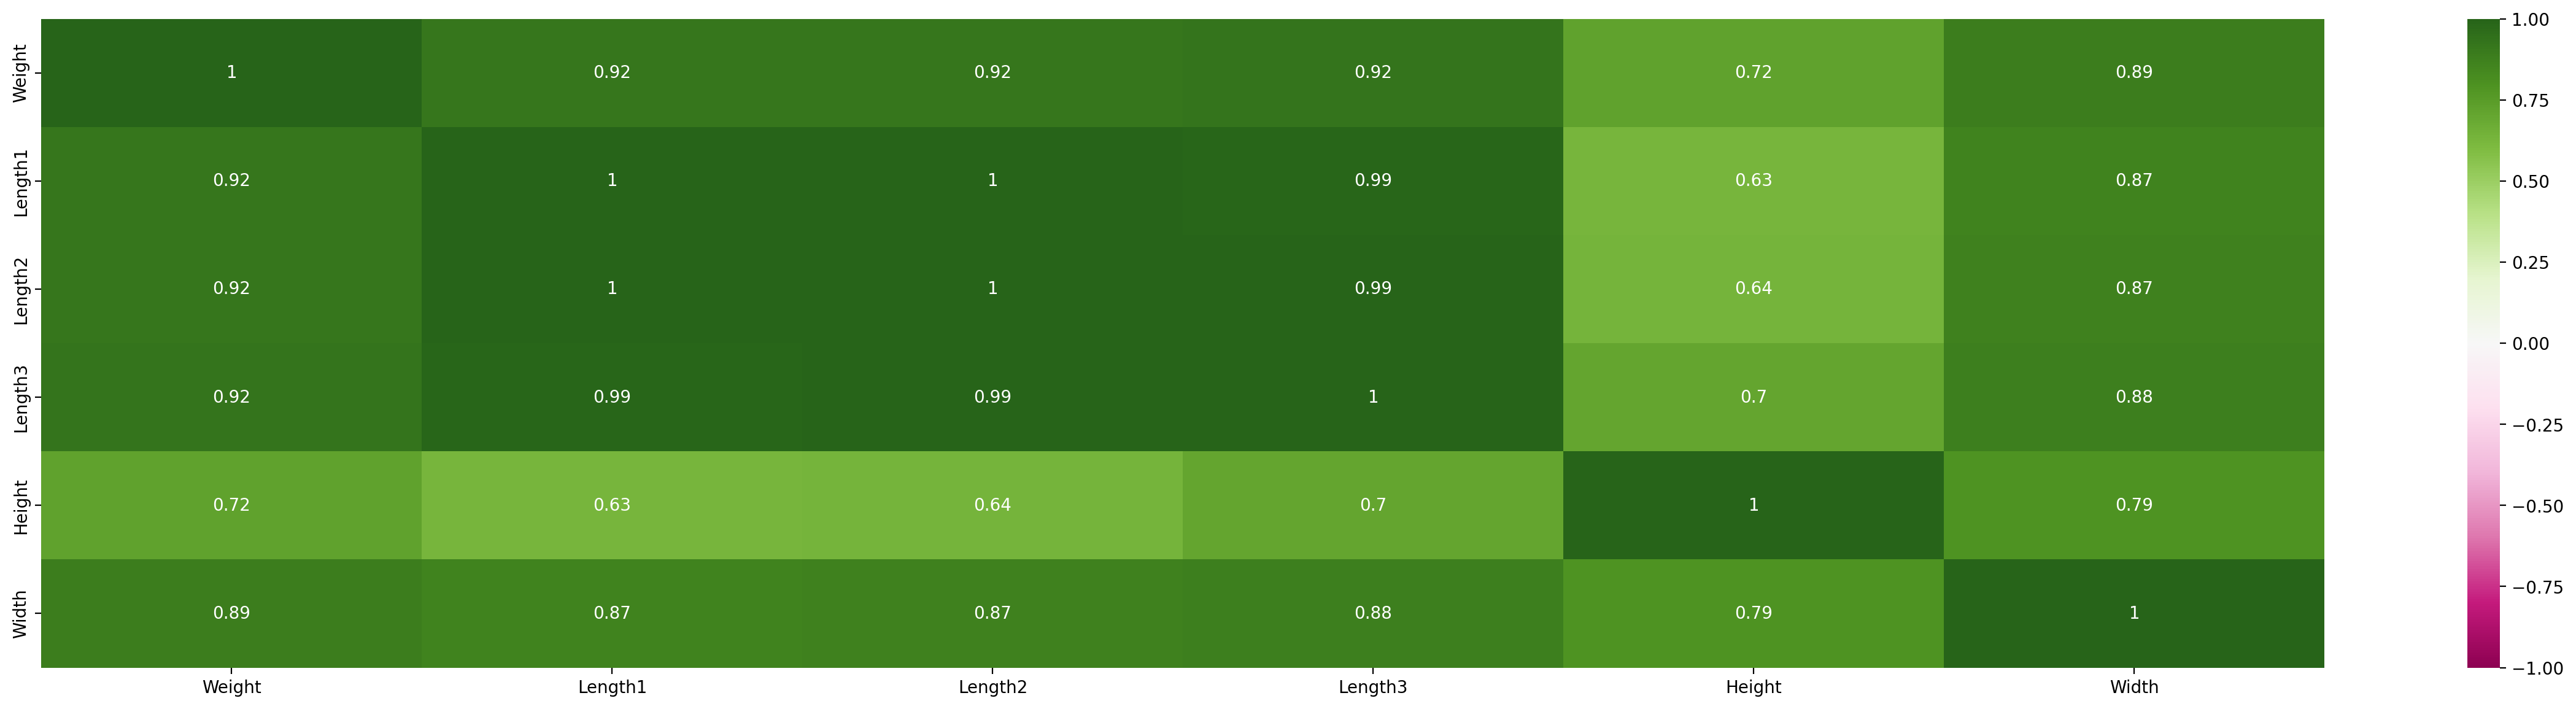

In [11]:
# CORRELATION HEATMAP
plt.figure(figsize = (30,7), dpi = 200)
sns.heatmap(data1.corr(), annot = True, vmin = -1, vmax = +1, cmap = "PiYG")
plt.show()

In [29]:
X = np.array(data1["Weight"]).reshape(-1,1)
y = np.array(data1["Height"]).reshape(-1,1)
X

array([[ 242. ],
       [ 290. ],
       [ 340. ],
       [ 363. ],
       [ 430. ],
       [ 450. ],
       [ 500. ],
       [ 390. ],
       [ 450. ],
       [ 500. ],
       [ 475. ],
       [ 500. ],
       [ 500. ],
       [ 340. ],
       [ 600. ],
       [ 600. ],
       [ 700. ],
       [ 700. ],
       [ 610. ],
       [ 650. ],
       [ 575. ],
       [ 685. ],
       [ 620. ],
       [ 680. ],
       [ 700. ],
       [ 725. ],
       [ 720. ],
       [ 714. ],
       [ 850. ],
       [1000. ],
       [ 920. ],
       [ 955. ],
       [ 925. ],
       [ 975. ],
       [ 950. ],
       [  40. ],
       [  69. ],
       [  78. ],
       [  87. ],
       [ 120. ],
       [   0. ],
       [ 110. ],
       [ 120. ],
       [ 150. ],
       [ 145. ],
       [ 160. ],
       [ 140. ],
       [ 160. ],
       [ 169. ],
       [ 161. ],
       [ 200. ],
       [ 180. ],
       [ 290. ],
       [ 272. ],
       [ 390. ],
       [ 270. ],
       [ 270. ],
       [ 306. ],
       [ 540. 

In [37]:
# CREATING POLYNOMIAL FEATURES WITH DEGREE 2
polynomial_converter = PolynomialFeatures(degree=2)
poly_features = polynomial_converter.fit_transform(X)

# SPLIT THIS NEW POLY DATA SET
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1, random_state=101)

# Standard Scaler
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

# TRAIN ON THIS NEW POLY SET
pr = LinearRegression(fit_intercept=True)

# FITTING AND PREDICT
pr.fit(X_train,y_train)
y_pred = pr.predict(X_test)

# MODEL EVALUATION
print(f"r2_score of Polynomial Regression: {r2_score(y_test,y_pred)}")
print("\n")
print(f"RMSE of Polynomial Regression: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score of Polynomial Regression: 0.8015724611962144


RMSE of Polynomial Regression: 1.6897784989651838


In [38]:
# MODEL EVALUATION ON TRULY UNSEEN DATA
POLYNOMIAL_R2_SCORE = np.mean(cross_val_score(pr,X_train,y_train, scoring = "r2", cv = 5))
print("cross_val_r2_score:",np.mean(cross_val_score(pr,X_train,y_train, scoring = "r2", cv = 5)))
print("cross_val_RMSE is",abs(np.mean(cross_val_score(pr,X_train,y_train, scoring = "neg_root_mean_squared_error", cv = 5))))

cross_val_r2_score: 0.6695705771947814
cross_val_RMSE is 2.342295872935028


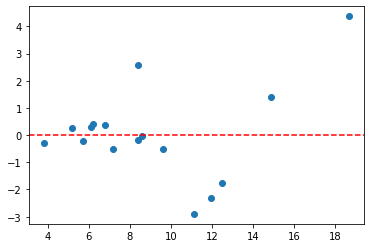

In [39]:
# LOOKS BETTER THAN LINEAR RESIDUAL
residuals = y_test - y_pred

plt.scatter(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')